In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import scipy.stats
import seaborn as sb
import datetime
from pylab import rcParams
%matplotlib inline
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print(check_output(["ls", "/Users/adithya/Downloads/machine_learning/ML_LAB/delhi.csv"]).decode("utf8"))

/Users/adithya/Downloads/machine_learning/ML_LAB/delhi.csv



In [2]:
data = pd.read_csv("/Users/adithya/Downloads/machine_learning/ML_LAB/delhi.csv",parse_dates=['datetime_utc'],skipinitialspace=True)

In [3]:
%matplotlib inline

In [4]:
data['Date'] = pd.to_datetime(data['datetime_utc'])
data['year'] = data['Date'].dt.year
data['month'] = data['Date'].dt.month
data['day'] = data['Date'].dt.day
data['hour'] = data['Date'].dt.hour

In [5]:
data.head()

,datetime_utc,conds,dewptm,fog,hail,heatindexm,hum,precipm,pressurem,rain,...,wdird,wdire,wgustm,windchillm,wspdm,Date,year,month,day,hour
0,1996-11-01 11:00:00,Smoke,9.0,0,0,NaN,27.0,NaN,1010.0,0,...,280.0,West,NaN,NaN,7.4,1996-11-01 11:00:00,1996,11,1,11
1,1996-11-01 12:00:00,Smoke,10.0,0,0,NaN,32.0,NaN,-9999.0,0,...,0.0,North,NaN,NaN,NaN,1996-11-01 12:00:00,1996,11,1,12
2,1996-11-01 13:00:00,Smoke,11.0,0,0,NaN,44.0,NaN,-9999.0,0,...,0.0,North,NaN,NaN,NaN,1996-11-01 13:00:00,1996,11,1,13
3,1996-11-01 14:00:00,Smoke,10.0,0,0,NaN,41.0,NaN,1010.0,0,...,0.0,North,NaN,NaN,NaN,1996-11-01 14:00:00,1996,11,1,14
4,1996-11-01 16:00:00,Smoke,11.0,0,0,NaN,47.0,NaN,1011.0,0,...,0.0,North,NaN,NaN,0.0,1996-11-01 16:00:00,1996,11,1,16


In [7]:
k1 = data[['hum', 'conds','tempm','month','pressurem','year','day']]

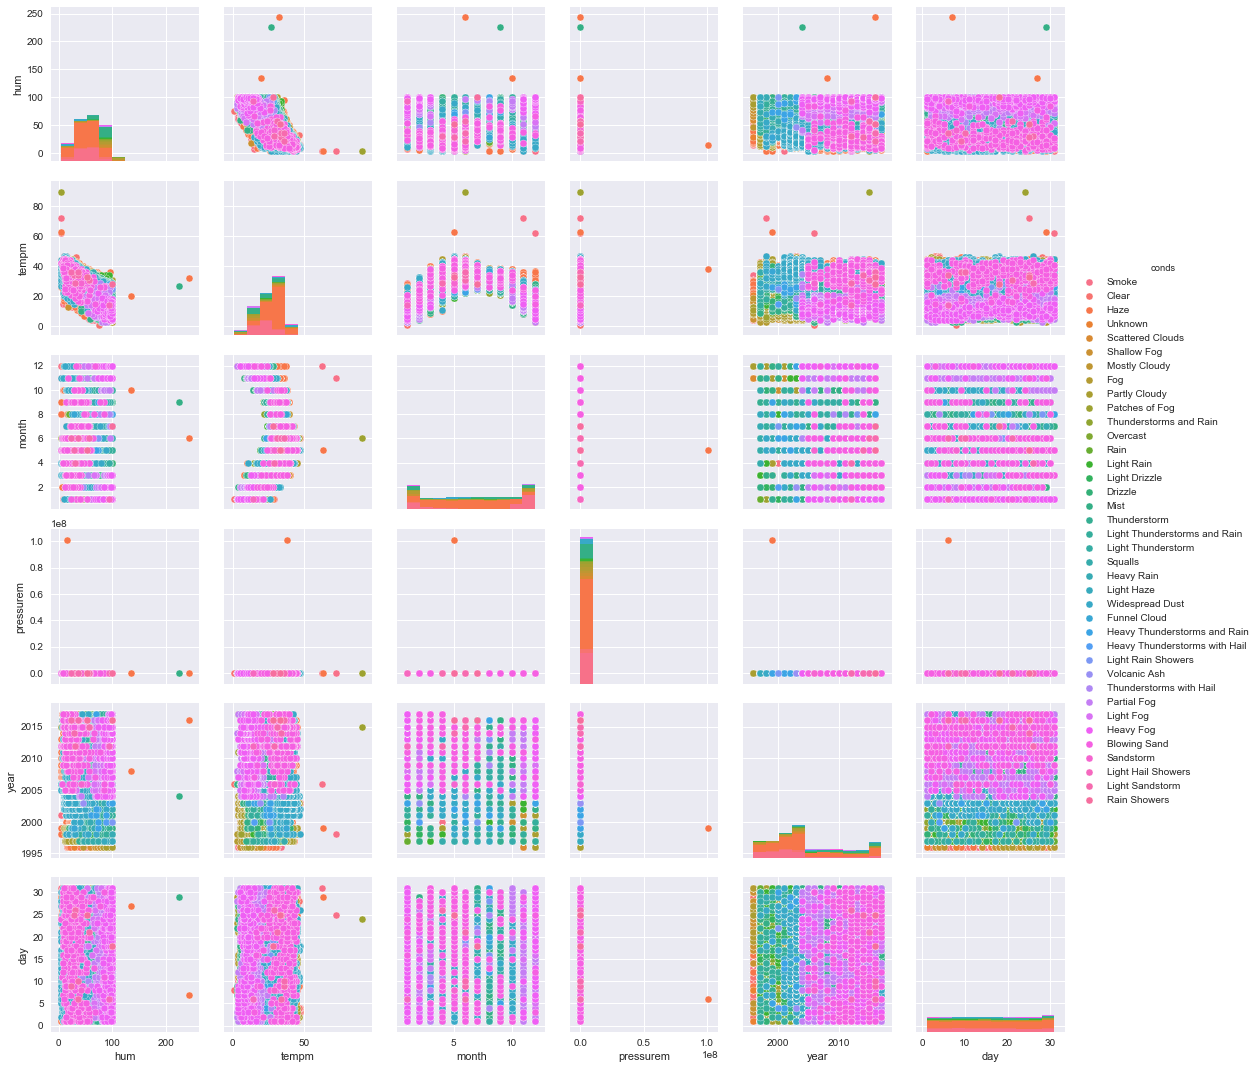

In [8]:
sb.pairplot(k1.dropna(),hue = 'conds')

In [9]:
data['conds'].unique()

array(['Smoke', 'Clear', 'Haze', 'Unknown', 'Scattered Clouds',
       'Shallow Fog', 'Mostly Cloudy', 'Fog', 'Partly Cloudy',
       'Patches of Fog', 'Thunderstorms and Rain', 'Overcast', 'Rain',
       'Light Rain', 'Light Drizzle', 'Drizzle', 'Mist', 'Volcanic Ash',
       'Thunderstorm', 'Light Thunderstorms and Rain',
       'Light Thunderstorm', 'Squalls', 'Heavy Rain', 'Light Haze',
       'Sandstorm', 'Widespread Dust', 'Funnel Cloud',
       'Heavy Thunderstorms and Rain', 'Heavy Thunderstorms with Hail',
       'Light Rain Showers', 'Thunderstorms with Hail', nan, 'Partial Fog',
       'Light Fog', 'Heavy Fog', 'Blowing Sand', 'Light Hail Showers',
       'Light Sandstorm', 'Light Freezing Rain', 'Rain Showers'], dtype=object)

In [ ]:
#all the combing code has been commented because it rendered the data useless for furtur analysis
#combining all rains:
#data.loc[data['conds']=='Heavy Rain' ,'conds'] ='Rain'
#data.loc[data['conds']=='Light Rain', 'conds'] = 'Rain' 
#data.loc[data['conds']=='Light Drizzle' ,'conds'] ='Rain'
#data.loc[data['conds']=='Drizzle' ,'conds'] ='Rain'
#data.loc[data['conds']=='Heavy Thunderstorms and Rain' ,'conds'] ='Rain'
#data.loc[data['conds']=='Light Rain Showers' ,'conds'] ='Rain'
#data.loc[data['conds']=='Light Freezing Rain','conds'] ='Rain'
#data.loc[data['conds']=='Light Hail Showers','conds'] ='Rain'
#data.loc[data['conds']=='Rain Showers','conds'] ='Rain'
#data.loc[data['conds']=='Squalls','conds'] ='Rain'

In [ ]:
#combining all Fog:
#data.loc[data['conds']=='Haze' ,'conds'] ='Fog'
#data.loc[data['conds']=='Shallow Fog', 'conds'] = 'Fog' 
#data.loc[data['conds']=='Patches of Fog' ,'conds'] ='Fog'
#data.loc[data['conds']=='Mist' ,'conds'] ='Fog'
#data.loc[data['conds']=='Light Haze' ,'conds'] ='Fog'
#data.loc[data['conds']=='Partial Fog' ,'conds'] ='Fog'
#data.loc[data['conds']=='Light Fog','conds'] ='Fog'
#data.loc[data['conds']=='Heavy Fog','conds'] ='Fog'

In [ ]:
#combining all ThunderStorms:
#data.loc[data['conds']=='Thunderstorms and Rain' ,'conds'] ='Thunderstorm'
#data.loc[data['conds']=='Light Thunderstorms and Rain', 'conds'] = 'Thunderstorm' 
#data.loc[data['conds']=='Light Thunderstorm' ,'conds'] ='Thunderstorm'
#data.loc[data['conds']=='Heavy Thunderstorms with Hail' ,'conds'] ='Thunderstorm'
#data.loc[data['conds']=='Thunderstorms with Hail' ,'conds'] ='Thunderstorm'

In [ ]:
#combining all clouds:
#data.loc[data['conds']=='Scattered Clouds' ,'conds'] ='Scattered Clouds'
#data.loc[data['conds']=='Mostly Cloudy', 'conds'] = 'Scattered Clouds'
#data.loc[data['conds']=='Partly Cloudy' ,'conds'] ='Scattered Clouds'
#data.loc[data['conds']=='Funnel Cloud' ,'conds'] ='Scattered Clouds'
#data.loc[data['conds']=='Overcast' ,'conds'] ='Scattered Clouds'

In [ ]:
#combining all storms:
#data.loc[data['conds']=='Sandstorm' ,'conds'] ='Sandstorm'
#data.loc[data['conds']=='Widespread Dust', 'conds'] = 'Sandstorm'
#data.loc[data['conds']=='Blowing Dust' ,'conds'] ='Sandstorm'
#data.loc[data['conds']=='Blowing Sand' ,'conds'] ='Sandstorm'
#data.loc[data['conds']=='Light Sandstorm' ,'conds'] ='Sandstorm'

In [ ]:
#combining all smoke:
#data.loc[data['conds']=='Volcanic Ash' ,'conds'] ='Smoke'

In [ ]:
#data['conds'].unique()

In [ ]:
#k1 = data[['hum', 'conds','tempm','month','pressurem','year','day']]

In [ ]:
#k2 = k1.query('conds == "Smoke" or conds == "Clear" or conds == "Fog" or conds == "Scattered Cloud" or conds == "Thunderstorm" or conds == "Rain" or conds == "Sandstorm"')

In [10]:
k2 = k1.query('conds == "Haze" or conds == "Fog"')

In [11]:
k2.head()

,hum,conds,tempm,month,pressurem,year,day
76,64.0,Haze,18.0,11,1011.0,1996,4
77,68.0,Haze,17.0,11,1010.0,1996,4
131,23.0,Haze,29.0,11,1014.0,1996,8
132,23.0,Haze,29.0,11,1014.0,1996,8
133,25.0,Haze,28.0,11,1014.0,1996,8


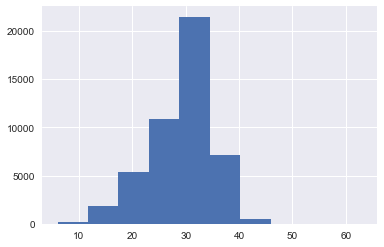

In [12]:
k2.loc[k2['conds'] == 'Haze', 'tempm'].hist()

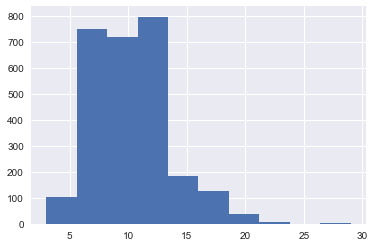

In [13]:
k2.loc[k2['conds'] == 'Fog', 'tempm'].hist()

In [14]:
k2.loc[(k2['conds']=='Haze','tempm')]

76        18.0
77        17.0
131       29.0
132       29.0
133       28.0
220       30.0
221       30.0
225       28.0
307       25.0
308       23.0
309       22.0
310       17.0
765       19.0
766       19.0
767       19.0
768       19.0
769       17.0
789       19.0
790       20.0
791       19.0
792       18.0
812        NaN
1524      17.0
1663      13.0
1665      15.0
1666      14.0
1743      15.0
1744      16.0
1745      16.0
1746      16.0
          ... 
100954    34.0
100955    32.0
100956    31.0
100957    30.0
100958    30.0
100959    36.0
100960    39.0
100961    39.0
100962    35.0
100963    33.0
100964    32.0
100965    30.0
100972    32.0
100973    30.0
100974    28.0
100975    27.0
100976    30.0
100977    36.0
100978    39.0
100979    39.0
100980    33.0
100981    30.0
100982    29.0
100983    26.0
100984    28.0
100985    34.0
100986    38.0
100987    36.0
100988    32.0
100989    30.0
Name: tempm, Length: 47602, dtype: float64

In [15]:
#average_humidity_rain=k2.loc[(k2['conds']=='Rain','hum')].mean()

In [16]:
#average_humidity_rain

In [17]:
k2 = k2.dropna()

In [18]:
df = pd.DataFrame(k2)

In [19]:
test = df.sort_values('conds', ascending=False)

In [20]:
filename = '/Users/adithya/Downloads/machine_learning/ML_LAB/clean_Data_delhi2.csv'

In [21]:
test.to_csv(filename,index=False, encoding = 'utf-8')

In [22]:
clean_data_delhi2 = pd.read_csv(filename)

In [23]:
clean_data_delhi2

,hum,conds,tempm,month,pressurem,year,day
0,64.0,Haze,18.0,11,1011.0,1996,4
1,50.0,Haze,34.0,8,1001.0,2006,25
2,53.0,Haze,33.0,8,1003.0,2006,24
3,47.0,Haze,35.0,8,1000.0,2006,24
4,46.0,Haze,35.0,8,999.0,2006,24
5,58.0,Haze,32.0,8,1000.0,2006,24
6,75.0,Haze,30.0,8,1002.0,2006,24
7,80.0,Haze,30.0,8,1001.0,2006,24
8,64.0,Haze,29.0,8,1002.0,2006,25
9,66.0,Haze,28.0,8,1004.0,2006,25


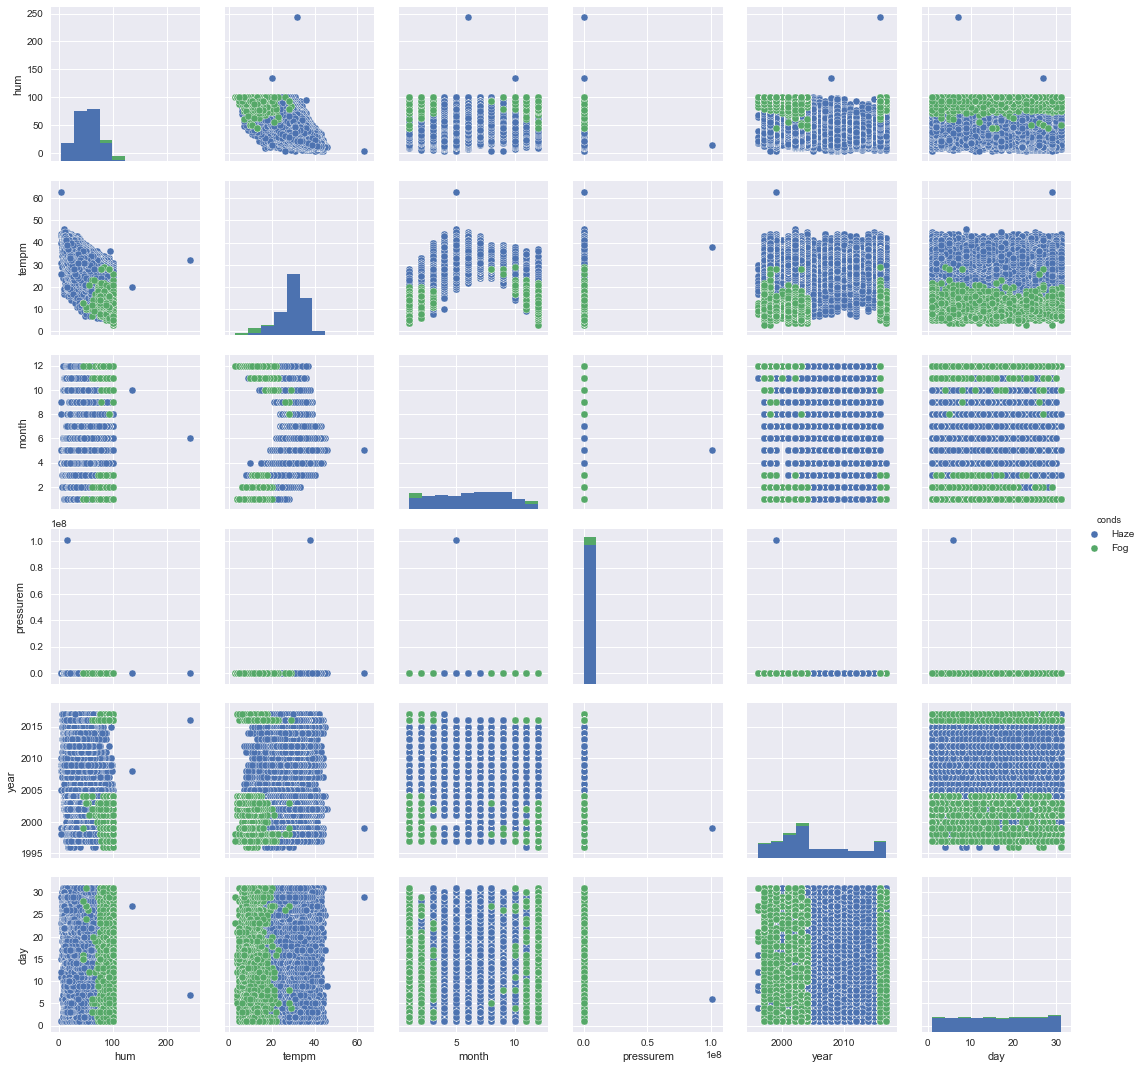

In [24]:
sb.pairplot(clean_data_delhi2,hue = 'conds')

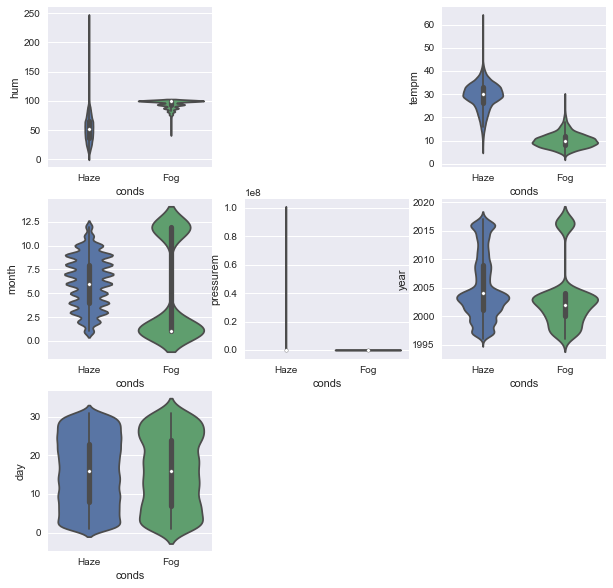

In [28]:
plt.figure(figsize=(10, 10))

for column_index, column in enumerate(clean_data_delhi2.columns):
    if column == 'conds':
        continue
    plt.subplot(3, 3, column_index + 1)
    sb.violinplot(x='conds', y=column, data=clean_data_delhi2)

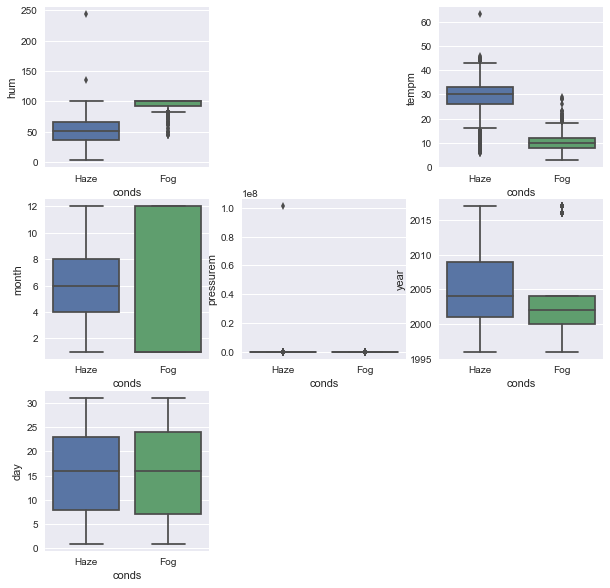

In [29]:
plt.figure(figsize=(10, 10))

for column_index, column in enumerate(clean_data_delhi2.columns):
    if column == 'conds':
        continue
    plt.subplot(3, 3, column_index + 1)
    sb.boxplot(x='conds', y=column, data=clean_data_delhi2)